In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [2]:
churn = pd.read_csv("Bank_Churn.csv")

In [3]:
churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# sns.pairplot(churn)

In [7]:
churn.corr(numeric_only=True)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<Axes: >

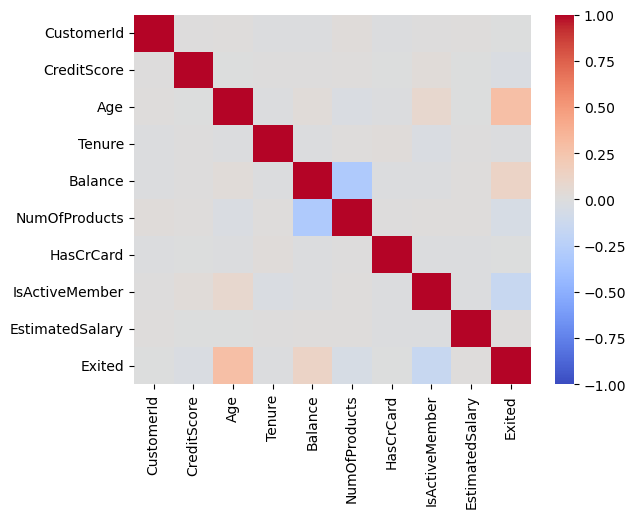

In [8]:
sns.heatmap(churn.corr(numeric_only=True), vmin=-1, vmax=1, cmap='coolwarm')

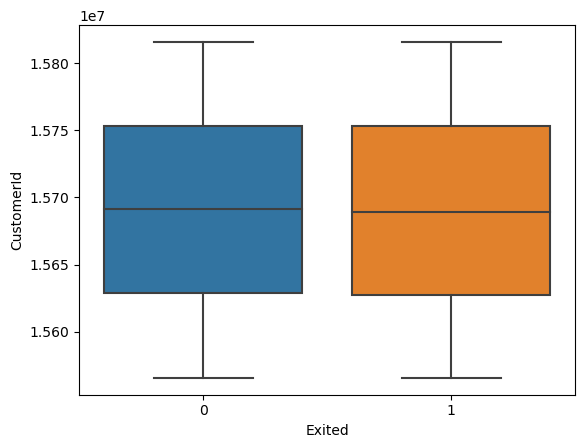

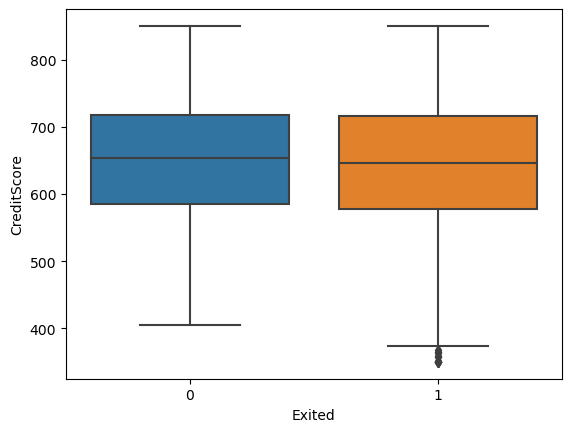

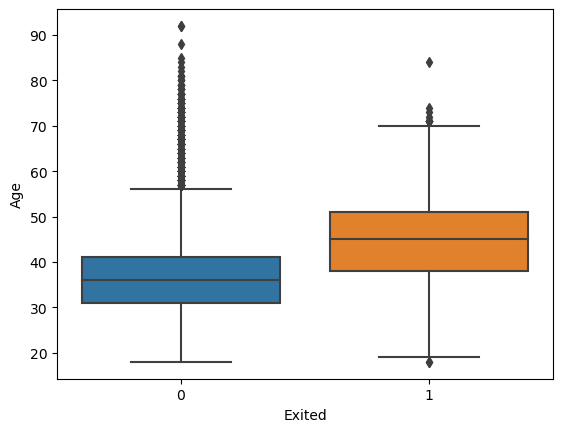

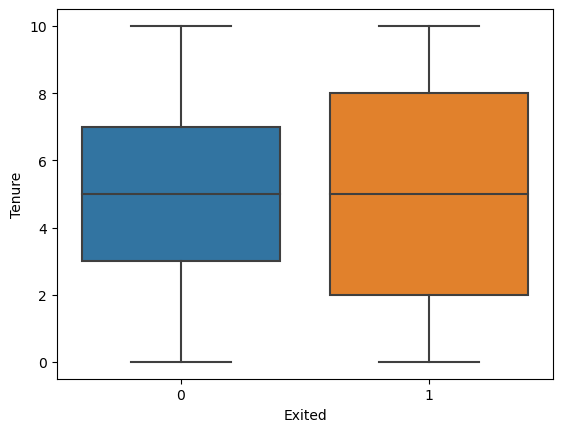

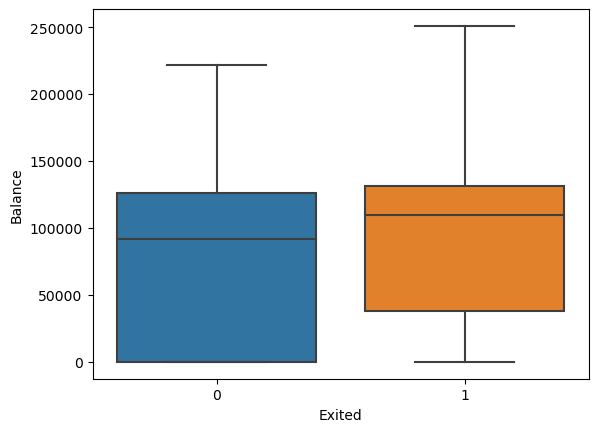

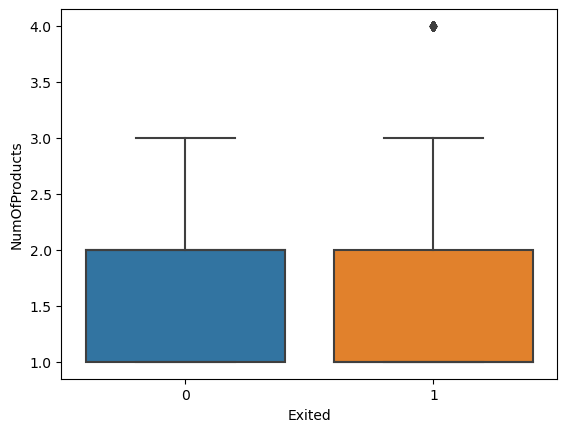

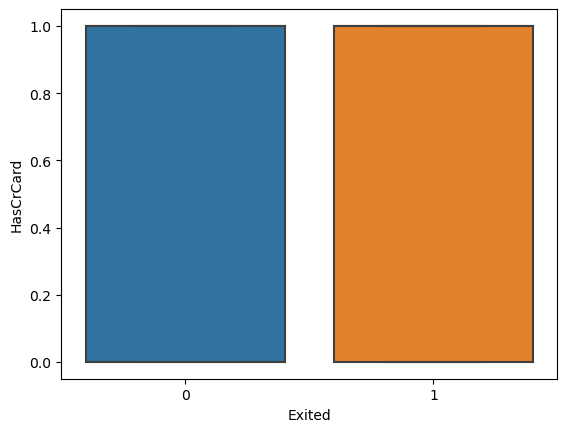

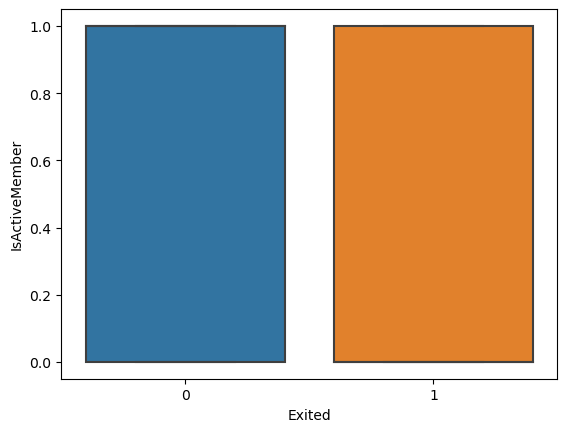

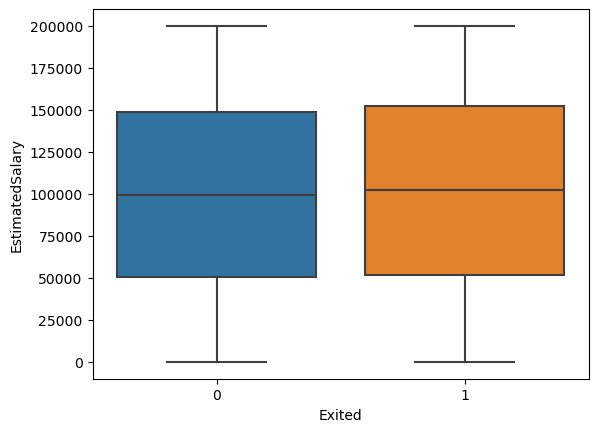

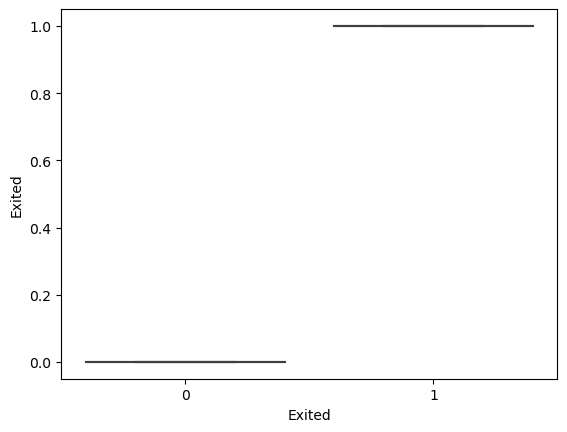

In [9]:
for col in churn.select_dtypes("number"):
    sns.boxplot(data=churn, x="Exited", y=col)
    plt.show()

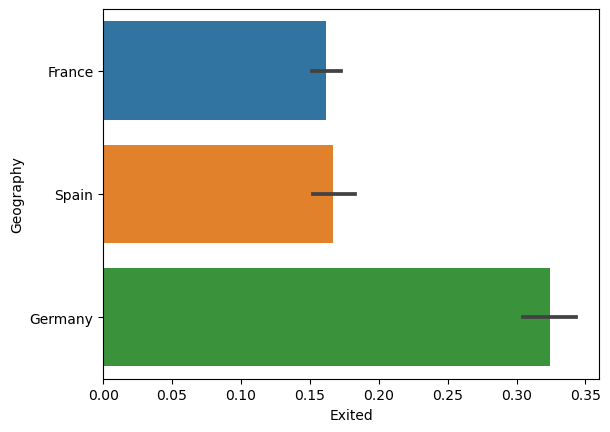

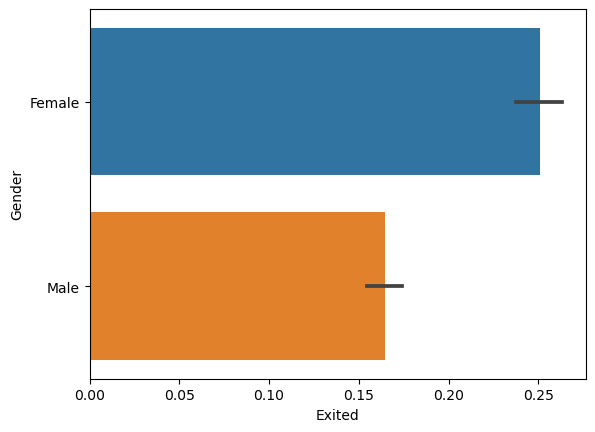

In [10]:
for col in churn.select_dtypes("object").columns[1:]:
    sns.barplot(data=churn, x="Exited", y=col)
    plt.show()

In [11]:
churn_modelling_df = churn.drop(["CustomerId", "Surname"], axis=1)

In [12]:
churn_modelling_df = churn_modelling_df.assign(
    balance_to_income = churn_modelling_df['Balance'] / churn_modelling_df['EstimatedSalary'],
    income_v_product = churn_modelling_df['EstimatedSalary'] / churn_modelling_df['NumOfProducts']
)

In [13]:
churn_modelling_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_to_income,income_v_product
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,101348.880
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,112542.580
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,37977.190
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,46913.315
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,79084.100


<Axes: xlabel='Exited', ylabel='balance_to_income'>

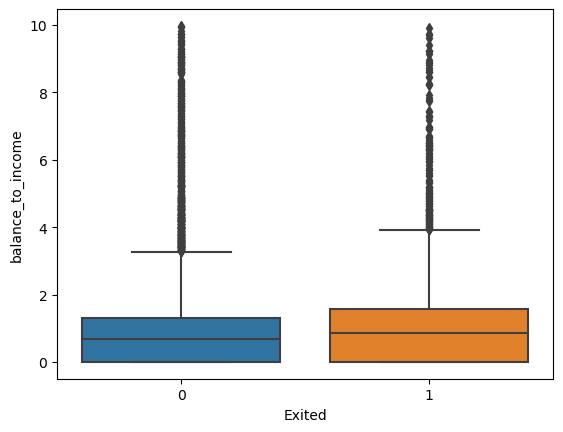

In [14]:
sns.boxplot(churn_modelling_df.query("balance_to_income < 10"), x="Exited", y="balance_to_income")

<Axes: xlabel='Exited', ylabel='income_v_product'>

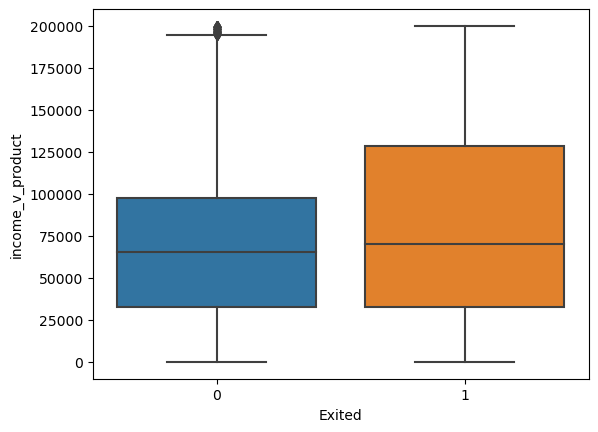

In [15]:
sns.boxplot(churn_modelling_df, x="Exited", y="income_v_product")

In [16]:
churn_modelling_df = pd.get_dummies(churn_modelling_df, drop_first=True, dtype="int")

In [17]:
churn_modelling_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_to_income,income_v_product,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,101348.880,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,112542.580,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,37977.190,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,46913.315,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,79084.100,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0.000000,48135.320,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0.564108,101699.770,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0.000000,42085.580,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.808230,46444.260,1,0,1


In [18]:
X = churn_modelling_df.drop("Exited", axis=1)

y = churn_modelling_df["Exited"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 8276 to 7816
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   int64  
 1   Age                8000 non-null   int64  
 2   Tenure             8000 non-null   int64  
 3   Balance            8000 non-null   float64
 4   NumOfProducts      8000 non-null   int64  
 5   HasCrCard          8000 non-null   int64  
 6   IsActiveMember     8000 non-null   int64  
 7   EstimatedSalary    8000 non-null   float64
 8   balance_to_income  8000 non-null   float64
 9   income_v_product   8000 non-null   float64
 10  Geography_Germany  8000 non-null   int32  
 11  Geography_Spain    8000 non-null   int32  
 12  Gender_Male        8000 non-null   int32  
dtypes: float64(4), int32(3), int64(6)
memory usage: 781.2 KB


In [21]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 8374 to 8466
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2000 non-null   int64  
 1   Age                2000 non-null   int64  
 2   Tenure             2000 non-null   int64  
 3   Balance            2000 non-null   float64
 4   NumOfProducts      2000 non-null   int64  
 5   HasCrCard          2000 non-null   int64  
 6   IsActiveMember     2000 non-null   int64  
 7   EstimatedSalary    2000 non-null   float64
 8   balance_to_income  2000 non-null   float64
 9   income_v_product   2000 non-null   float64
 10  Geography_Germany  2000 non-null   int32  
 11  Geography_Spain    2000 non-null   int32  
 12  Gender_Male        2000 non-null   int32  
dtypes: float64(4), int32(3), int64(6)
memory usage: 195.3 KB


In [22]:
#Logistic Regression
logreg = LogisticRegression(solver='newton-cholesky')

In [23]:
lr = logreg.fit(X_train, y_train)

In [24]:
print(f"Train accuracy: {lr.score(X_train, y_train)}")

Train accuracy: 0.817


In [25]:
confusion_matrix(y_train, lr.predict(X_train))

array([[6119,  253],
       [1211,  417]], dtype=int64)

In [26]:
recall_score(y_train, lr.predict(X_train))

0.25614250614250617

In [27]:
list(zip(X_train, lr.coef_[0]))

[('CreditScore', -0.00091871111290644),
 ('Age', 0.0734867067743719),
 ('Tenure', -0.015723073221588748),
 ('Balance', 2.1594952278198635e-06),
 ('NumOfProducts', 0.7986881910560671),
 ('HasCrCard', -0.11739952340062884),
 ('IsActiveMember', -1.0796835443611241),
 ('EstimatedSalary', -1.7153764609830572e-05),
 ('balance_to_income', 0.0005748891887945847),
 ('income_v_product', 2.2213179944336814e-05),
 ('Geography_Germany', 0.7955740153693514),
 ('Geography_Spain', 0.03551308451564061),
 ('Gender_Male', -0.4993144026831346)]

In [28]:
confusion_matrix(y_test, lr.predict(X_test))

array([[1536,   55],
       [ 320,   89]], dtype=int64)

In [29]:
print(f"Test accuracy: {lr.score(X_test, y_test)}")

Test accuracy: 0.8125


In [30]:
precision_score(y_test, lr.predict(X_test))

0.6180555555555556

In [31]:
recall_score(y_test, lr.predict(X_test))

0.2176039119804401

In [32]:
f1_score(y_test, lr.predict(X_test))

0.3218806509945751

In [33]:
y_probs = lr.predict_proba(X_test)[:, 1]

In [34]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_probs)

In [35]:
auc_score = auc(fpr1, tpr1)

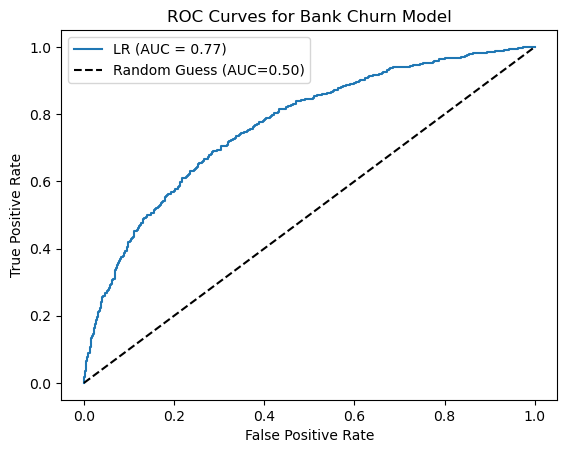

In [36]:
# Plot the ROC Curve
plt.plot(fpr1, tpr1, label=f'LR (AUC = {auc_score:.2f})')

#Plot Random Guess
plt.plot([0,1], [0,1], 'k--', label='Random Guess (AUC=0.50)')

#Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Bank Churn Model')
plt.legend()
plt.show()


In [37]:
p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr.predict_proba(X_train)[:, 1])

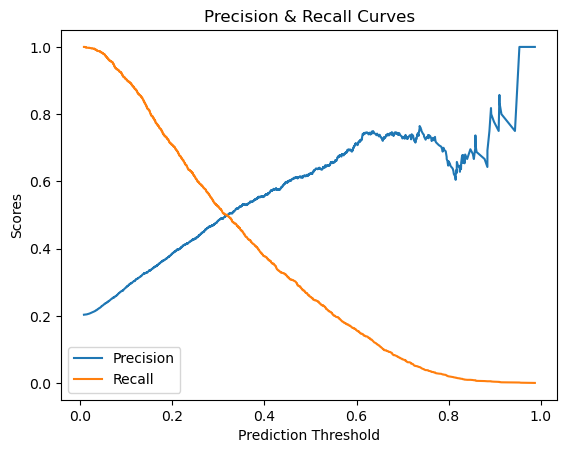

In [38]:
plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.legend()
plt.title('Precision & Recall Curves')
plt.show()

In [39]:
np.where(p_curve > .5)

(array([6377, 6383, 6384, ..., 7998, 7999, 8000], dtype=int64),)

In [40]:
t_curve[6377]

0.31971714493603737

In [41]:
confusion_matrix(y_test, lr.predict_proba(X_test)[:, 1] > 0.32)

array([[1400,  191],
       [ 223,  186]], dtype=int64)

In [42]:
precision_score(y_test, lr.predict_proba(X_test)[:, 1] > 0.32)

0.493368700265252

In [43]:
recall_score(y_test, lr.predict_proba(X_test)[:, 1] > 0.32)

0.4547677261613692

In [44]:
#Random Forest Classification
rf = RandomForestClassifier()

rf = rf.fit(X_train, y_train)

print(f"Train accuracy: {lr.score(X_train, y_train)}")
print(f"Test accuracy: {lr.score(X_test, y_test)}")

Train accuracy: 0.817
Test accuracy: 0.8125


In [45]:
rf = RandomForestClassifier(random_state=2023, n_jobs=-1)

params = {
    'n_estimators' : np.arange(start=100, stop=1100, step=100),
    'max_features' : [None, "sqrt"],
    'bootstrap' : [True],
    'max_samples' : [None, .3, .5, .9],
    'max_depth' : np.arange(start=1, stop=11, step=1),
    'min_samples_leaf' : [2, 5, 10, 20, 100]
}

grid = RandomizedSearchCV(rf, params, n_iter=100, scoring="accuracy")

grid.fit(X_train, y_train)

grid.best_params_

{'n_estimators': 400,
 'min_samples_leaf': 2,
 'max_samples': 0.9,
 'max_features': None,
 'max_depth': 9,
 'bootstrap': True}

In [46]:
params = {
    'n_estimators' : np.arange(start=1, stop=401, step=50),
    'max_samples' : [.8, .9, 1],
    'max_depth' : [8, 9, 10],
    'min_samples_leaf' : [1, 2, 3]
}

grid = GridSearchCV(rf, params, scoring="accuracy")

grid.fit(X_train, y_train)

grid.best_params_

{'max_depth': 9, 'max_samples': 0.8, 'min_samples_leaf': 2, 'n_estimators': 51}

In [48]:
rf = RandomForestClassifier(**{'n_estimators' : 51,
    'bootstrap' : True,
    'max_samples' : .8,
    'max_depth' : 9,
    'min_samples_leaf' : 2})

rf = rf.fit(X_train, y_train)

print(f"Train accuracy: {rf.score(X_train, y_train)}")
print(f"Test accuracy: {rf.score(X_test, y_test)}")

Train accuracy: 0.88625
Test accuracy: 0.8545


In [49]:
y_probs = lr.predict_proba(X_test)[:, 1]

fpr1, tpr1, thresholds = roc_curve(y_test, y_probs)

auc_score = auc(fpr1, tpr1)

auc_score

0.766118708689926

<Axes: xlabel='importance', ylabel='feature'>

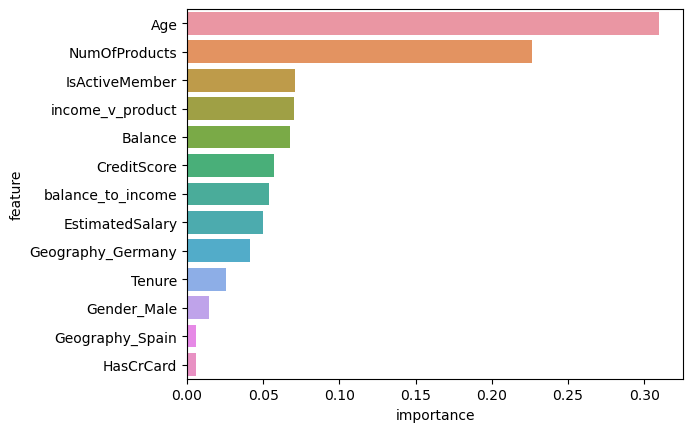

In [50]:
importance = pd.DataFrame({'feature' : X_train.columns,
                          'importance' : rf.feature_importances_}).sort_values('importance', ascending=False).iloc[:20]

sns.barplot(importance, x='importance', y='feature')